In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn

In [2]:
#loading the iris dataset into a dataframe
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df["target"] = iris.target

In [3]:
#checking the first five rows of the data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#checking random rows of the dataframe
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
43,5.0,3.5,1.6,0.6,0
122,7.7,2.8,6.7,2.0,2
64,5.6,2.9,3.6,1.3,1
115,6.4,3.2,5.3,2.3,2
145,6.7,3.0,5.2,2.3,2


In [5]:
#checking the number of rows and columns of the dataframe
iris_df.shape

(150, 5)

In [6]:
#defining a function to get information about the data
def get_info():
    info = pd.DataFrame(index = iris_df.columns)
    info["null values"] = iris_df.isnull().sum()
    info["duplicates"] = iris_df.duplicated().sum()
    info["unique values"] = iris_df.nunique()
    info["data type"] = iris_df.dtypes
    return info
get_info()

,null values,duplicates,unique values,data type
sepal length (cm),0,1,35,float64
sepal width (cm),0,1,23,float64
petal length (cm),0,1,43,float64
petal width (cm),0,1,22,float64
target,0,1,3,int32


In [7]:
iris_df.drop_duplicates(inplace = True)

In [8]:
get_info()

,null values,duplicates,unique values,data type
sepal length (cm),0,0,35,float64
sepal width (cm),0,0,23,float64
petal length (cm),0,0,43,float64
petal width (cm),0,0,22,float64
target,0,0,3,int32


In [9]:
X = iris_df.drop("target", axis = 1)
y = iris_df.target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier (n_estimators = 25)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25)

In [12]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
56,6.3,3.3,4.7,1.6
42,4.4,3.2,1.3,0.2
50,7.0,3.2,4.7,1.4
93,5.0,2.3,3.3,1.0
36,5.5,3.5,1.3,0.2
149,5.9,3.0,5.1,1.8
116,6.5,3.0,5.5,1.8
26,5.0,3.4,1.6,0.4
132,6.4,2.8,5.6,2.2
55,5.7,2.8,4.5,1.3


In [13]:
y_test

56     1
42     0
50     1
93     1
36     0
149    2
116    2
26     0
132    2
55     1
14     0
31     0
88     1
48     0
61     1
23     0
70     1
57     1
65     1
84     1
89     1
12     0
125    2
10     0
21     0
107    2
92     1
45     0
112    2
103    2
123    2
145    2
62     1
77     1
6      0
136    2
35     0
97     1
105    2
38     0
28     0
111    2
128    2
46     0
34     0
Name: target, dtype: int32

In [14]:
model.score(X_test, y_test)

0.9555555555555556

In [15]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0,
       2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0,
       0])

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[17,  0,  0],
       [ 0, 13,  2],
       [ 0,  0, 13]], dtype=int64)

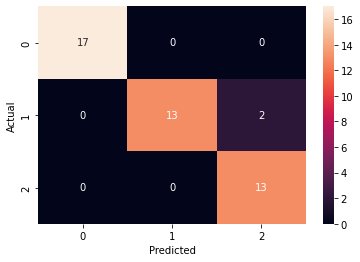

In [17]:
sns.heatmap(cm, annot = True, fmt='.0f')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [18]:
from sklearn.metrics import classification_report
classification_report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [19]:
#creating a classification  report
print(classification_report(y_test, y_predict ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.87      0.93        15
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

